In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
# matplotlib.rcParams['figure.dpi']= 200
import altair as alt
pd.set_option('display.max_rows', 500)
import numpy as np
import plotnine as p9
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from altair_saver import save

In [2]:
author = pd.read_csv('../data/ht_class/ht_cleaned_author_df.csv')
paper = pd.read_csv('../data/ht_class/ht_cleaned_paper_df.csv')

### Number of countries by year

In [4]:
## How many counries in total
countries = author['Affiliation Country Code']
len(list(set(countries)))

43

In [11]:
# how many rows miss openalex author id
author[author['OpenAlex Author ID'].isnull()].shape[0]

101

In [14]:
author[author.Year == 1990].shape[0]

119

In [15]:
year_1990_author = author[author.Year == 1990]
author_id_1990 = year_1990_author['OpenAlex Author ID'].tolist()
dic = dict(Counter(author_id_1990))
twice_1990 = [x for x in dic.keys() if dic[x] > 1][0]
year_1990_author[year_1990_author['OpenAlex Author ID'] == twice_1990]
# This author appeared twice in 1990

,Year,DOI,Title,Number of Authors,Author Position,Author Name,OpenAlex Author ID,Affiliation Name,Affiliation Country Code,Affiliation Type,Binary Type,Cross-type Collaboration,International Collaboration
7742,1990,10.1109/VISUAL.1990.146385,A journey into the fourth dimension,2.0,2.0,E.S. Panduranga,https://openalex.org/A2302757246,"Department of Computer Sciences, Johns Hopkins...",US,education,education,False,True
9947,1990,10.1109/VISUAL.1990.146393,A numerical method for rendering spherical ref...,3.0,2.0,E.S. Panduranga,https://openalex.org/A2302757246,"Department of Computer Sciences, Johns Hopkins...",US,education,education,False,False


In [8]:
cntry_num_by_year = author.groupby('Year')['Affiliation Country Code'].nunique().reset_index(
    name='number of participating countries')
cntry_num_by_year.head()

,Year,number of participating countries
0,1990,5
1,1991,7
2,1992,11
3,1993,13
4,1994,9


In [16]:
cntry_num_by_year.tail()

,Year,number of participating countries
27,2017,21
28,2018,18
29,2019,19
30,2020,24
31,2021,27


In [17]:
cntry_num_by_year[cntry_num_by_year.Year.isin([1994, 1995, 2003, 2004,2007,2008])]

,Year,number of participating countries
4,1994,9
5,1995,11
13,2003,15
14,2004,16
17,2007,19
18,2008,21


In [9]:
year_1990_author = author[author.Year == 1990]

In [10]:
Counter(year_1990_author['Affiliation Country Code'])

Counter({'US': 109, 'DE': 4, 'AU': 3, 'CA': 1, 'FR': 2})

### Top countries

In [23]:
dic = dict(Counter(author['Affiliation Country Code']).most_common(5))
top_five = list(dic.keys())
df = pd.DataFrame(dic.items(), columns = ['country', 'count'])
df['ratio'] = round(df['count'] / 12413, 3)
df

,country,count,ratio
0,US,6596,0.531
1,DE,1640,0.132
2,CN,1010,0.081
3,AT,522,0.042
4,CA,425,0.034


In [24]:
df.ratio.sum()

0.8200000000000001

In [26]:
dic = dict(Counter(author['Affiliation Country Code']).most_common(10))
top_10 = list(dic.keys())
df = pd.DataFrame(dic.items(), columns = ['country', 'count'])
df['ratio'] = round(df['count'] / 12413, 3)
df

,country,count,ratio
0,US,6596,0.531
1,DE,1640,0.132
2,CN,1010,0.081
3,AT,522,0.042
4,CA,425,0.034
5,GB,410,0.033
6,NL,307,0.025
7,FR,304,0.024
8,CH,160,0.013
9,AU,145,0.012


In [27]:
df.ratio.sum()

0.927

#### Redistributions

In [28]:
# prepare for timeseries plot
cntry_ts_prop = []
for group in author.groupby('Year'):
    year = group[0]
    year_total = group[1].shape[0]
    group[1]['cntry new'] = group[1]['Affiliation Country Code'].apply(
        lambda x: x if x in top_five else 'Other'
    )
    for cntry_group in group[1].groupby('cntry new'):
        cntry_code = cntry_group[0]
        cntry_year_total = cntry_group[1].shape[0]
        cntry_prop = cntry_year_total / year_total
        cntry_ts_prop.append((year, cntry_code, cntry_year_total, cntry_prop))

In [29]:
cntry_ts_prop_df = pd.DataFrame(
    list(cntry_ts_prop), columns=['year', 'country', 'year total', 'ratio']) 
cntry_ts_prop_df.replace({'CA': 'Canada',
                          'DE': 'Germany',
                          'CN': 'China',
                          'AT': 'Austria',
                         }, inplace = True)
cntry_ts_prop_df.head()

,year,country,year total,ratio
0,1990,Canada,1,0.008403
1,1990,Germany,4,0.033613
2,1990,Other,5,0.042017
3,1990,US,109,0.915966
4,1991,Germany,3,0.024194


In [31]:
cntry_ts_prop_df[cntry_ts_prop_df.year.isin([2016, 2017])]

,year,country,year total,ratio
136,2016,Austria,23,0.042672
137,2016,Canada,20,0.037106
138,2016,China,55,0.102041
139,2016,Germany,70,0.129870
140,2016,Other,128,0.237477
141,2016,US,243,0.450835
142,2017,Austria,44,0.081633
143,2017,Canada,16,0.029685
144,2017,China,72,0.133581
145,2017,Germany,70,0.129870


#### Addressing the issue of Hong Kong

In [32]:
author[author['Affiliation Country Code'] == 'CN'].shape[0]

1010

In [33]:
def check_substring(substring_list, string_to_check):
    true_false_list = []
    for i in substring_list:
        true_false_list.append(i in string_to_check)
    return True in true_false_list

In [34]:
hk_list = ['Hong Kong', 'hong kong', 'HK', 'hk']

In [35]:
author['Country Code New'] = author.apply(
    lambda row: 'HK' if check_substring(
        hk_list, row['Affiliation Name']) else row['Affiliation Country Code'], axis = 1
)

In [37]:
# 257 out of 1007 authors coded as coming from CN actually came from Hong Kong
# One author actually came from Hong Kong was mislabelled as coming from YE
hk_author = author[author['Country Code New'] == 'HK']
hk_author.shape[0]

258

<AxesSubplot:xlabel='Year', ylabel='count'>

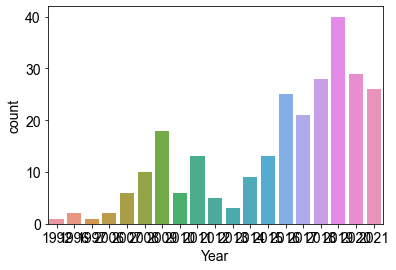

In [38]:
sns.countplot(x = hk_author.Year)

In [39]:
dic = dict(Counter(author['Country Code New']).most_common(5))
list(dic.keys())
df = pd.DataFrame(dic.items(), columns = ['country', 'count'])
df['ratio'] = round(df['count'] / 12413, 3)
df

,country,count,ratio
0,US,6596,0.531
1,DE,1640,0.132
2,CN,752,0.061
3,AT,522,0.042
4,CA,425,0.034


In [40]:
# top_five = ['US', 'DE', 'CN', 'AT', 'CA']
top_five = list(dic.keys())
author[author['Country Code New'].isin(top_five)].shape[0] / author.shape[0]

0.8003705792314509

In [41]:
### TOP 10
dic2 = dict(Counter(author['Country Code New']).most_common(10))
list(dic2.keys())
# top_ten = ['US', 'DE', 'CN', 'AT', 'CA', 'GB', 'FR', 'NL', 'CH', 'AU']
top_ten = list(dic2.keys())
author[author['Affiliation Country Code'].isin(top_ten)].shape[0] / author.shape[0]

0.9162974301135905

In [42]:
cntry_ts_prop = []
for group in author.groupby('Year'):
    year = group[0]
    year_total = group[1].shape[0]
    group[1]['cntry new'] = group[1]['Country Code New'].apply(
        lambda x: x if x in top_five else 'Other'
    )
    for cntry_group in group[1].groupby('cntry new'):
        cntry_code = cntry_group[0]
        cntry_year_total = cntry_group[1].shape[0]
        cntry_prop = cntry_year_total / year_total
        cntry_ts_prop.append((year, cntry_code, cntry_year_total, cntry_prop))

cntry_ts_prop_df = pd.DataFrame(
    list(cntry_ts_prop), columns=['year', 'country', 'year total', 'ratio']) 

In [43]:
list(set(cntry_ts_prop_df.country.tolist()))

['AT', 'US', 'CA', 'Other', 'CN', 'DE']

In [45]:
cntry_ts_prop_df[cntry_ts_prop_df.year >= 2016]
# China overtook DE in 2019 as the second largest source of authors

,year,country,year total,ratio
133,2016,AT,23,0.042672
134,2016,CA,20,0.037106
135,2016,CN,30,0.055659
136,2016,DE,70,0.129870
137,2016,Other,153,0.283859
138,2016,US,243,0.450835
139,2017,AT,44,0.081633
140,2017,CA,16,0.029685
141,2017,CN,51,0.094620
142,2017,DE,70,0.129870


Text(0.5, 1.0, 'number of authros from participating countries over the past 32 years')

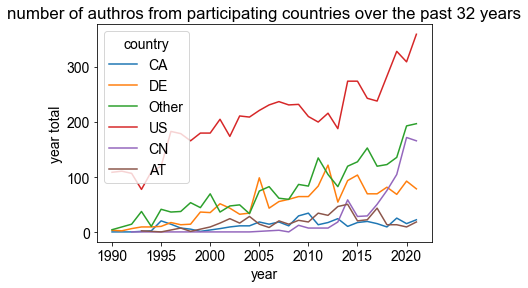

In [46]:
g = sns.lineplot(x='year', y='year total', hue='country', data = cntry_ts_prop_df)
g.set_title('number of authros from participating countries over the past 32 years')

### Involving US authors

In [54]:
Counter(paper['With US Authors'])

Counter({True: 2113, False: 1120})

In [60]:
2113/paper.shape[0]

0.6535725332508506

In [47]:
def get_total_and_ratio_by_year(DF, subgroup_par):
    tuples = []
    for group in DF.groupby('Year'):
        year = group[0]
        total = group[1].shape[0]
        for subgroup in group[1].groupby(subgroup_par):
            subtype = 'Yes' if subgroup[0] else 'No'
            count = subgroup[1].shape[0]
            ratio = count / total
            tuples.append((year, subtype, count, ratio))
    dff = pd.DataFrame(
        list(tuples), columns=['year', 'type', 'count', 'ratio']) 
    return dff

In [49]:
withus_authors = get_total_and_ratio_by_year(paper, 'With US Authors')
withus_authors.rename(columns = {
#     'year': 'Year',
    'type': 'With US Authors', 
    'ratio': 'Ratio'}, inplace=True)
withus_authors['Year'] = pd.to_datetime(withus_authors['year'], format='%Y')
withus_authors.head(10)

,year,With US Authors,count,Ratio,Year
0,1990,No,6,0.115385,1990-01-01
1,1990,Yes,46,0.884615,1990-01-01
2,1991,No,4,0.083333,1991-01-01
3,1991,Yes,44,0.916667,1991-01-01
4,1992,No,9,0.176471,1992-01-01
5,1992,Yes,42,0.823529,1992-01-01
6,1993,No,20,0.363636,1993-01-01
7,1993,Yes,35,0.636364,1993-01-01
8,1994,No,8,0.153846,1994-01-01
9,1994,Yes,44,0.846154,1994-01-01


In [51]:
withus_authors[withus_authors.year.isin([2010, 2011, 2021])]

,year,With US Authors,count,Ratio,Year
40,2010,No,39,0.357798,2010-01-01
41,2010,Yes,70,0.642202,2010-01-01
42,2011,No,63,0.529412,2011-01-01
43,2011,Yes,56,0.470588,2011-01-01
62,2021,No,69,0.408284,2021-01-01
63,2021,Yes,100,0.591716,2021-01-01


In [58]:
withus_authors[withus_authors['With US Authors'] == 'Yes']['count'].sum()

2113

## Affiliation types

In [61]:
tuples = []
for group in author.groupby('Year'):
    year = group[0]
    total = group[1].shape[0]
    for subgroup in group[1].groupby('Binary Type'):
        aff_type = subgroup[0]
        count = subgroup[1].shape[0]
        ratio = count / total
        tuples.append((year, aff_type, count, ratio))

In [63]:
binary_type_df = pd.DataFrame(list(tuples), columns=['year', 'type', 'count', 'ratio']) 
binary_type_df['Year'] = pd.to_datetime(binary_type_df['year'], format='%Y')
binary_type_df.replace({
    'education': 'Education',
    'non-education': 'Non-Education'
}, inplace= True)
binary_type_df.head(10)

,year,type,count,ratio,Year
0,1990,Education,71,0.596639,1990-01-01
1,1990,Non-Education,48,0.403361,1990-01-01
2,1991,Education,68,0.548387,1991-01-01
3,1991,Non-Education,56,0.451613,1991-01-01
4,1992,Education,58,0.442748,1992-01-01
5,1992,Non-Education,73,0.557252,1992-01-01
6,1993,Education,66,0.511628,1993-01-01
7,1993,Non-Education,63,0.488372,1993-01-01
8,1994,Education,87,0.649254,1994-01-01
9,1994,Non-Education,47,0.350746,1994-01-01


In [64]:
binary_type_df.tail(5)

,year,type,count,ratio,Year
59,2019,Non-Education,103,0.151917,2019-01-01
60,2020,Education,680,0.857503,2020-01-01
61,2020,Non-Education,113,0.142497,2020-01-01
62,2021,Education,709,0.841044,2021-01-01
63,2021,Non-Education,134,0.158956,2021-01-01


In [8]:
# edu and non-edu within us
dic = dict(Counter(author[author['Affiliation Country Code'] == 'US']['Binary Type']))
dff1 = pd.DataFrame(dic.items(), columns = ['type', 'count'])
dff1['ratio'] = dff['count'] / dff['count'].sum()
dff1

,type,count,ratio
0,education,4824,0.842015
1,non-education,1772,0.157985


In [9]:
# edu and non-edu outside of the us
dic = dict(Counter(author[author['Affiliation Country Code'] != 'US']['Binary Type']))
dff2 = pd.DataFrame(dic.items(), columns = ['type', 'count'])
dff2['ratio'] = dff['count'] / dff['count'].sum()
dff2

,type,count,ratio
0,education,4898,0.842015
1,non-education,919,0.157985


In [13]:
# the proportion of nonedu from us against all nonedu
dff1.iloc[1,1] / (dff1.iloc[1,1] + dff2.iloc[1,1])

0.6584912671869194

In [15]:
dff2.iloc[0,1] / (dff2.iloc[0,1] + dff2.iloc[1,1])

0.8420147842530514